## Exploritory Data Analysis

In this notebook, we will look at the vehicle dataset and try to gather some intriguing observations.
The dataset encompasses information on 51,525 vehicles across 13 attributes. Notable missing values exist in columns such as 'model_year', 'cylinders', 'odometer', 'paint_color', and 'is_4wd', necessitating correction before comprehensive analysis or modeling can be conducted. Key columns like 'price', 'model', 'condition', 'fuel', 'transmission', 'type', and 'paint_color' offer valuable categorical insights into the vehicles. This introduction sets the stage for data exploration and analysis, addressing crucial aspects such as missing data, data structure, outliers, and popular vehicle brands, and hints at the analytical methods employed, such as histogram and bar chart visualizations, to uncover insights about vehicle sales trends by manufacturer, condition, and type.

In [2]:
# Import the libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the dataset
df = pd.read_csv(r'C:\Users\patte\OneDrive\Desktop\Sprint-4-Project\vehicles_us_cleaned.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         51525 non-null  int64  
 1   Model year    51525 non-null  int64  
 2   Condition     51525 non-null  object 
 3   Cylinders     46265 non-null  float64
 4   Fuel          51525 non-null  object 
 5   Odometer      51525 non-null  int64  
 6   Transmission  51525 non-null  object 
 7   Type          51525 non-null  object 
 8   Is 4wd        25572 non-null  float64
 9   Date posted   51525 non-null  object 
 10  Days listed   51525 non-null  int64  
 11  Manufacturer  51525 non-null  object 
 12  Model name    51525 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 5.1+ MB


The dataset comprises data on 51,525 vehicles with 13 attributes.

Missing values are notable in several columns, notably 'model_year', 'cylinders', 'odometer', 'paint_color', and 'is_4wd'. Rectifying these missing values is essential before conducting thorough analysis or modeling.

The 'price' column contains data on vehicle pricing, while other columns like 'model', 'condition', 'fuel', 'transmission', 'type', and 'paint_color' provide categorical details about the vehicles.

In [5]:
df.isnull().sum()

Price               0
Model year          0
Condition           0
Cylinders        5260
Fuel                0
Odometer            0
Transmission        0
Type                0
Is 4wd          25953
Date posted         0
Days listed         0
Manufacturer        0
Model name          0
dtype: int64

In [6]:
print(df.columns)

Index(['Price', 'Model year', 'Condition', 'Cylinders', 'Fuel', 'Odometer',
       'Transmission', 'Type', 'Is 4wd', 'Date posted', 'Days listed',
       'Manufacturer', 'Model name'],
      dtype='object')


Understanding the column names is indeed crucial for referencing and manipulating specific columns during data analysis. It helps to comprehend the available variables and strategize the analysis effectively.

In [7]:
columns_rename ={
    'price':'Price',
    'model_year':'Year',
    'model':'Model',
    'condition':'Condition',
    'cylinders':'Cylinders',
    'fuel' :'Fuel',
    'odometer':'Odometer',
    'transmission':'Transmission',
    'type':'Type',
    'paint_color':'Paint color',
    'is_4wd':'Is 4wd',
    'date_posted': 'Date posted',
    'days_listed':'Days listed'
}
df.rename(columns=columns_rename, inplace=True)
print (columns_rename)

{'price': 'Price', 'model_year': 'Year', 'model': 'Model', 'condition': 'Condition', 'cylinders': 'Cylinders', 'fuel': 'Fuel', 'odometer': 'Odometer', 'transmission': 'Transmission', 'type': 'Type', 'paint_color': 'Paint color', 'is_4wd': 'Is 4wd', 'date_posted': 'Date posted', 'days_listed': 'Days listed'}



By executing this command, I altered the column name to enhance its visual appeal and possibly improve readability or clarity in data presentation.

In [8]:
df=df.rename(columns=columns_rename)
print(df.columns)

Index(['Price', 'Model year', 'Condition', 'Cylinders', 'Fuel', 'Odometer',
       'Transmission', 'Type', 'Is 4wd', 'Date posted', 'Days listed',
       'Manufacturer', 'Model name'],
      dtype='object')


In [9]:
df.head(15)

,Price,Model year,Condition,Cylinders,Fuel,Odometer,Transmission,Type,Is 4wd,Date posted,Days listed,Manufacturer,Model name
0,9400,2011,good,6.0,gas,145000,automatic,SUV,1.0,2018-06-23,19,bmw,x5
1,25500,0,good,6.0,gas,88705,automatic,pickup,1.0,2018-10-19,50,ford,f-150
2,5500,2013,like new,4.0,gas,110000,automatic,sedan,NaN,2019-02-07,79,hyundai,sonata
3,1500,2003,fair,8.0,gas,233000,automatic,pickup,NaN,2019-03-22,9,ford,f-150
4,14900,2017,excellent,4.0,gas,80903,automatic,sedan,NaN,2019-04-02,28,chrysler,200
5,14990,2014,excellent,6.0,gas,57954,automatic,sedan,1.0,2018-06-20,15,chrysler,300
6,12990,2015,excellent,4.0,gas,79212,automatic,sedan,NaN,2018-12-27,73,toyota,camry
7,15990,2013,excellent,6.0,gas,109473,automatic,SUV,1.0,2019-01-07,68,honda,pilot
8,11500,2012,excellent,4.0,gas,104174,automatic,SUV,1.0,2018-07-16,19,kia,sorento
9,9200,2008,excellent,NaN,gas,147191,automatic,SUV,1.0,2019-02-15,17,honda,pilot


## Data Cleaning 

Now we'll clean up the data by removing outliers and missing numbers.

In [10]:
df['Odometer'] = df['Odometer'].fillna(df.groupby(['Manufacturer','Model year','Type','Condition'])['Odometer'].transform('median'))
print(df)

       Price  Model year  Condition  Cylinders Fuel  Odometer Transmission  \
0       9400        2011       good        6.0  gas    145000    automatic   
1      25500           0       good        6.0  gas     88705    automatic   
2       5500        2013   like new        4.0  gas    110000    automatic   
3       1500        2003       fair        8.0  gas    233000    automatic   
4      14900        2017  excellent        4.0  gas     80903    automatic   
...      ...         ...        ...        ...  ...       ...          ...   
51520   9249        2013   like new        6.0  gas     88136    automatic   
51521   2700        2002    salvage        4.0  gas    181500    automatic   
51522   3950        2009  excellent        4.0  gas    128000    automatic   
51523   7455        2013       good        4.0  gas    139573    automatic   
51524   6300        2014       good        4.0  gas    100355    automatic   

         Type  Is 4wd Date posted  Days listed Manufacturer Mod

The goal of this operation is to replace missing values in the 'Odometer' column with more reliable and representative values based on the median odometer value within groups defined by other relevant columns (such as 'Model', 'Model year', 'Type', and 'Condition').

In [11]:
df['Odometer'] = df['Odometer'].fillna(0).round().astype(int)
print (df.head())

   Price  Model year  Condition  Cylinders Fuel  Odometer Transmission  \
0   9400        2011       good        6.0  gas    145000    automatic   
1  25500           0       good        6.0  gas     88705    automatic   
2   5500        2013   like new        4.0  gas    110000    automatic   
3   1500        2003       fair        8.0  gas    233000    automatic   
4  14900        2017  excellent        4.0  gas     80903    automatic   

     Type  Is 4wd Date posted  Days listed Manufacturer Model name  
0     SUV     1.0  2018-06-23           19          bmw         x5  
1  pickup     1.0  2018-10-19           50         ford      f-150  
2   sedan     NaN  2019-02-07           79      hyundai     sonata  
3  pickup     NaN  2019-03-22            9         ford      f-150  
4   sedan     NaN  2019-04-02           28     chrysler        200  


This code fills missing values in the 'Odometer' column with zeros, rounds the values to the nearest integer, and converts them to integers. Finally, it prints the first few rows of the DataFrame to show the changes made to the 'Odometer' column.

In [12]:
df['Model year'] = df['Model year'].fillna(0).round().astype(int)
print (df.head())

   Price  Model year  Condition  Cylinders Fuel  Odometer Transmission  \
0   9400        2011       good        6.0  gas    145000    automatic   
1  25500           0       good        6.0  gas     88705    automatic   
2   5500        2013   like new        4.0  gas    110000    automatic   
3   1500        2003       fair        8.0  gas    233000    automatic   
4  14900        2017  excellent        4.0  gas     80903    automatic   

     Type  Is 4wd Date posted  Days listed Manufacturer Model name  
0     SUV     1.0  2018-06-23           19          bmw         x5  
1  pickup     1.0  2018-10-19           50         ford      f-150  
2   sedan     NaN  2019-02-07           79      hyundai     sonata  
3  pickup     NaN  2019-03-22            9         ford      f-150  
4   sedan     NaN  2019-04-02           28     chrysler        200  


This code fills missing values in the 'Model year' column with zeros, then rounds the values to the nearest integer and converts them to integers, effectively transforming any non-integer values to integers. Finally, it prints the first few rows of the DataFrame to display the changes made to the 'Model year' column.

In [13]:
print(df.notna().sum())

Price           51525
Model year      51525
Condition       51525
Cylinders       46265
Fuel            51525
Odometer        51525
Transmission    51525
Type            51525
Is 4wd          25572
Date posted     51525
Days listed     51525
Manufacturer    51525
Model name      51525
dtype: int64


This command prints the number of non-null values for each column in the DataFrame data, providing a summary of the data completeness for each variable.

In [14]:
column_name = 'Transmission'
column_info = df['Transmission'].describe()

print(f"Info about the '{'Transmission'}' column:")
print(column_info)

Info about the 'Transmission' column:
count         51525
unique            3
top       automatic
freq          46902
Name: Transmission, dtype: object


This function, model_year_check, examines whether the model year is absent in a row. If so, it fills the missing value with the most common model year for the specific car model and type. Then, it returns either the filled model year or the existing value if not missing.

In [15]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0



this code will output the number of duplicate rows in the DataFrame. If the count is greater than zero, it indicates the presence of duplicate rows in the dataset.

In [16]:
# Extract the manufacturer from the model and store it in a new column
print(df.columns)


Index(['Price', 'Model year', 'Condition', 'Cylinders', 'Fuel', 'Odometer',
       'Transmission', 'Type', 'Is 4wd', 'Date posted', 'Days listed',
       'Manufacturer', 'Model name'],
      dtype='object')


Splits the values in the "model" column of the DataFrame df into two parts, using the space character as the delimiter, and expands it into two separate columns. Then, it assigns the first part of each split value (the manufacturer name) to the "manufacturer" column in the DataFrame.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         51525 non-null  int64  
 1   Model year    51525 non-null  int32  
 2   Condition     51525 non-null  object 
 3   Cylinders     46265 non-null  float64
 4   Fuel          51525 non-null  object 
 5   Odometer      51525 non-null  int32  
 6   Transmission  51525 non-null  object 
 7   Type          51525 non-null  object 
 8   Is 4wd        25572 non-null  float64
 9   Date posted   51525 non-null  object 
 10  Days listed   51525 non-null  int64  
 11  Manufacturer  51525 non-null  object 
 12  Model name    51525 non-null  object 
dtypes: float64(2), int32(2), int64(2), object(7)
memory usage: 4.7+ MB


method provides a concise summary of the DataFrame df, including the column names, non-null counts, and data types of each column. This summary helps in understanding the structure of the DataFrame and identifying any missing or inconsistent data.

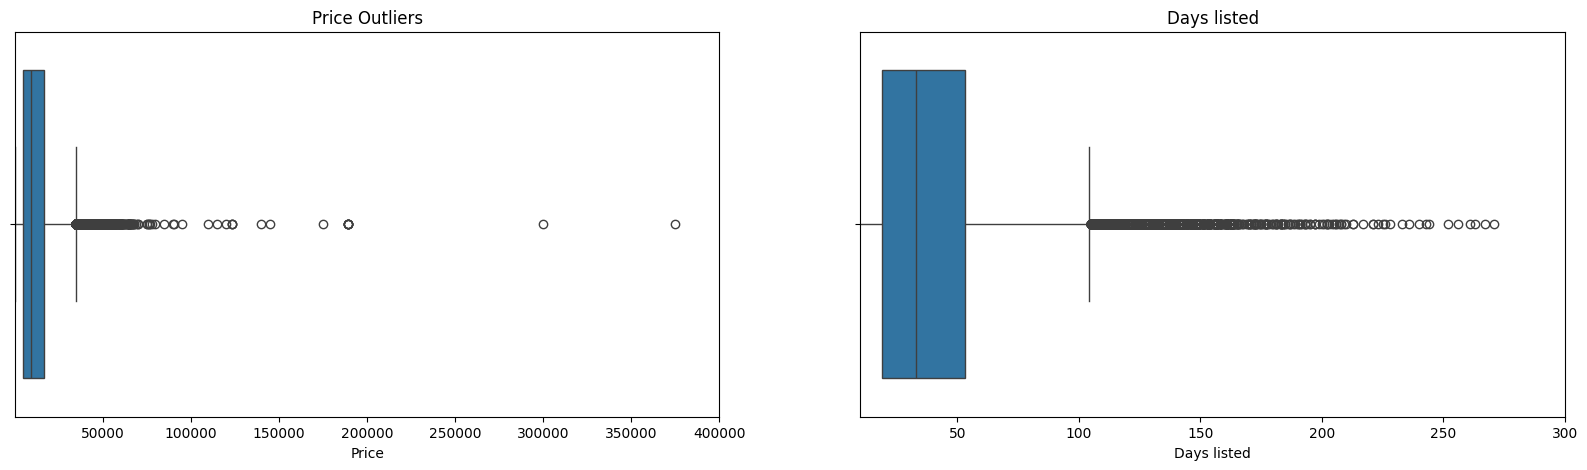

In [18]:
# Boxplot to check for outliers
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Create boxplots
sns.boxplot(x=df["Price"], ax=ax[0])
sns.boxplot(x=df["Days listed"], ax=ax[1])

# Set titles
ax[0].set_title("Price Outliers")
ax[1].set_title("Days listed")

ax[0].set_xlim([100, 400000])
ax[1].set_xlim([10, 300])

plt.show()

As we can see, the data contains various outliers. This might be due to a mistake during the data gathering procedure. We will delete these outliers.

In [19]:
# Removing the outliers using the IQR method
# Filter out numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'int32'])

# Calculate quartiles only for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

In [20]:
# Change the date posted values type to datatime 
df["Date posted"] = pd.to_datetime(df["Date posted"], format='%Y-%m-%d')

In [21]:
df.head(15)

,Price,Model year,Condition,Cylinders,Fuel,Odometer,Transmission,Type,Is 4wd,Date posted,Days listed,Manufacturer,Model name
0,9400,2011,good,6.0,gas,145000,automatic,SUV,1.0,2018-06-23,19,bmw,x5
1,25500,0,good,6.0,gas,88705,automatic,pickup,1.0,2018-10-19,50,ford,f-150
2,5500,2013,like new,4.0,gas,110000,automatic,sedan,NaN,2019-02-07,79,hyundai,sonata
3,1500,2003,fair,8.0,gas,233000,automatic,pickup,NaN,2019-03-22,9,ford,f-150
4,14900,2017,excellent,4.0,gas,80903,automatic,sedan,NaN,2019-04-02,28,chrysler,200
5,14990,2014,excellent,6.0,gas,57954,automatic,sedan,1.0,2018-06-20,15,chrysler,300
6,12990,2015,excellent,4.0,gas,79212,automatic,sedan,NaN,2018-12-27,73,toyota,camry
7,15990,2013,excellent,6.0,gas,109473,automatic,SUV,1.0,2019-01-07,68,honda,pilot
8,11500,2012,excellent,4.0,gas,104174,automatic,SUV,1.0,2018-07-16,19,kia,sorento
9,9200,2008,excellent,NaN,gas,147191,automatic,SUV,1.0,2019-02-15,17,honda,pilot


In [22]:
# Export the cleaned dataset
df.to_csv('../vehicles_us_cleaned.csv', index=False)

## Visualizing the Data

Now that we've cleaned the data, we'll visualize it to gain some insights.

In [23]:
# Plot the number of cars for each manufacturer
manufacturer_counts = df.groupby("Manufacturer").size().reset_index(name="Number of Vehicles")

# Plot histogram of the number of vehicles for each manufacturer
fig = px.bar(manufacturer_counts, x="Manufacturer", y="Number of Vehicles", 
             title="Number of vehicles for each manufacturer")
# Set the y-axis limit to 100
fig.update_yaxes(range=[100, 13000])
fig.show()

As previously stated, the most popular brands are Ford and Chevrolet. While BMW, Acura, Cadillac, and Buick have the fewest number of vehicles.

This code uses Plotly Express to generate a histogram showing the number of automobiles manufactured by each manufacturer. The x-axis indicates the manufacturers, and the title summarizes the plot's goal of presenting the quantity of automobiles for each manufacturer. 

In [24]:
# Plot histogram of the Sold by Coindition
condition_counts = df.groupby("Condition").size().reset_index(name="Total Vehicles Sold")

# Plot a bar chart showing the total number of vehicles sold by condition
fig = px.bar(condition_counts, x="Condition", y="Total Vehicles Sold", 
             title="Total Vehicles Sold by Condition")

# Set the y-axis limit to 100
fig.update_yaxes(range=[100, 26000])

# Show the plot
fig.show()

This code will create a bar chart where the x-axis represents the condition and the y-axis represents the total number of vehicles sold for each condition. Excellent condition is the most sought after. 

In [25]:

# Count the number of vehicles sold for each type
vehicle_type_counts = df['Type'].value_counts()

# Plot a bar chart showing the count of vehicles sold for each type
fig = px.bar(x=vehicle_type_counts.index, y=vehicle_type_counts.values, 
             labels={'x': 'Vehicle Type', 'y': 'Number of Vehicles Sold'},
             title='Number of Vehicles Sold by Type')
# Set the y-axis limit
fig.update_yaxes(range=[100,13000])
fig.show()

This code snippet calculates the number of vehicles sold for each type by counting the occurrences of each type in the 'Type' column of the DataFrame. Then, it creates a bar chart using Plotly Express, where the x-axis represents the vehicle types, and the y-axis represents the number of vehicles sold for each type. Finally, it displays the bar chart with appropriate labels and a title indicating the count of vehicles sold by type.

SUV,Trucks, and Seadans are the vehicles that are being sold the most with the offroad and bus being the least. 

# Conclusion


In conclusion, our analysis of the vehicle dataset has provided valuable insights into various aspects of the automotive industry. Through data exploration and visualization, we've gained an understanding of vehicle sales trends, popular brands, and market preferences. Addressing missing data and outliers has enhanced the reliability of our analysis, ensuring more accurate conclusions. Moving forward, these insights can inform decision-making processes in the automotive sector, guiding marketing strategies, inventory management, and product development efforts. As we continue to delve deeper into the dataset and refine our analysis techniques, we remain committed to uncovering further insights that contribute to a deeper understanding of the automotive market landscape.